In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Energy VS angle

In [2]:
angle = np.arange(0, 185, 5)

In [3]:
energy = np.array([2.804, 2.802, 2.798, 2.792, 2.782, 2.770, 2.756, 2.740, 2.721, 2.701,
                 2.679, 2.655, 2.631, 2.605, 2.578, 2.551, 2.523, 2.496, 2.468, 2.441, 
                 2.414, 2.388, 2.363, 2.339, 2.316, 2.294, 2.274, 2.255, 2.239, 2.224,
                 2.21, 2.199, 2.190, 2.182, 2.177, 2.174, 2.173])

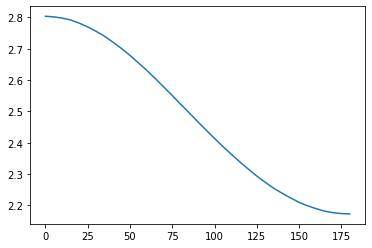

In [4]:
plt.plot(angle, energy)

In [5]:
fit_coeff = np.polyfit(angle, energy, 4)
fit_coeff

array([-3.76446665e-10,  3.75645182e-07, -7.76735734e-05,  5.23749916e-04,
        2.80130909e+00])

In [6]:
fit_result = fit_coeff[0] * angle**4 + fit_coeff[1] * angle**3 + fit_coeff[2] * angle**2 + fit_coeff[3] * angle + fit_coeff[4]

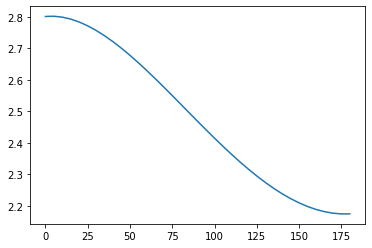

In [7]:
plt.plot(angle, fit_result)

## Cross section VS angle

In [8]:
legendre_coeff = np.array([0.692, 0.304, 0.004])

In [9]:
from scipy.special import legendre

In [10]:
legendre(0)

poly1d([1.])

In [11]:
legendre(2)

poly1d([ 1.5,  0. , -0.5])

In [12]:
legendre(4)

poly1d([ 4.37500000e+00,  4.85722573e-16, -3.75000000e+00,  2.42861287e-16,
        3.75000000e-01])

In [13]:
cos = np.cos(np.radians(angle))

In [14]:
legendre_result = (legendre_coeff[0] + 
                   legendre_coeff[1] * (legendre(2)[0] * cos**2 + legendre(2)[2]) + 
                   legendre_coeff[2] * (legendre(4)[0] * cos**4 + legendre(4)[1] * cos**3 + legendre(4)[2] * cos**2 + legendre(4)[3] * cos + legendre(4)[4]))

In [15]:
legendre_result

array([1.        , 1.00124585, 1.00494657, 1.01099265, 1.01920488,
       1.02933927, 1.04109375, 1.0541167 , 1.06801692, 1.082375  ,
       1.09675569, 1.11072103, 1.12384375, 1.13572062, 1.14598524,
       1.15431985, 1.1604657 , 1.16423153, 1.1655    , 1.16423153,
       1.1604657 , 1.15431985, 1.14598524, 1.13572062, 1.12384375,
       1.11072103, 1.09675569, 1.082375  , 1.06801692, 1.0541167 ,
       1.04109375, 1.02933927, 1.01920488, 1.01099265, 1.00494657,
       1.00124585, 1.        ])

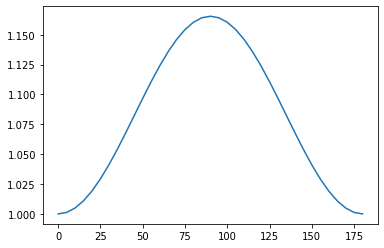

In [16]:
plt.plot(angle, legendre_result)

### approximation and normalization

In [17]:
coeff = np.polyfit(angle, legendre_result, 5)
coeff

array([-2.05997666e-25,  3.15723625e-09, -1.13660505e-06,  1.08130542e-04,
       -1.05049564e-03,  1.00347848e+00])

In [18]:
approximated = coeff[0] * angle**5 + coeff[1] * angle**4 + coeff[2] * angle**3 + coeff[3] * angle**2 + coeff[4] * angle + coeff[5]

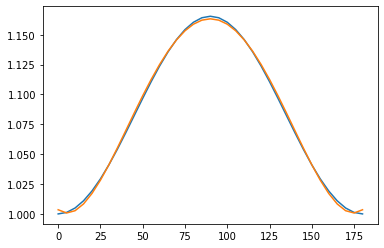

In [19]:
plt.plot(angle, legendre_result)
plt.plot(angle, approximated)

In [20]:
normalization = np.sum(approximated) * 5

In [21]:
coeff_final = coeff / normalization
coeff_final

array([-1.03070338e-27,  1.57971405e-11, -5.68697059e-09,  5.41028046e-07,
       -5.25612462e-06,  5.02087564e-03])

In [22]:
approximated_final = approximated / normalization

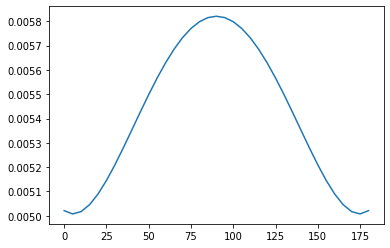

In [23]:
plt.plot(angle, approximated_final)

### To get the CDF

In [24]:
legendre_final = legendre_result / (legendre_result.sum())

In [25]:
cummulative = np.array([legendre_final[:i].sum() for i in range(37)])

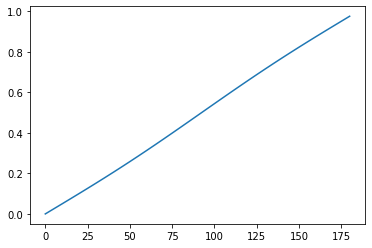

In [26]:
plt.plot(angle, cummulative)

In [27]:
cdf_coeff = np.polyfit(angle, cummulative, 3)
cdf_coeff







array([-4.55564278e-08,  1.25782970e-05,  4.60832782e-03,  2.27093768e-03])

In [28]:
cdf_fit = cdf_coeff[0] * angle**3 + cdf_coeff[1] * angle**2 + cdf_coeff[2] * angle + cdf_coeff[3]

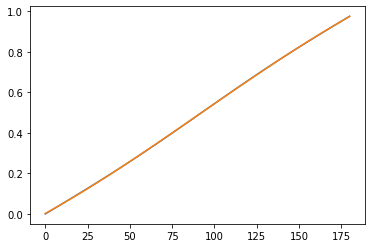

In [29]:
plt.plot(angle, cummulative)
plt.plot(angle, cdf_fit)

Looks fine.

## cross section VS energy

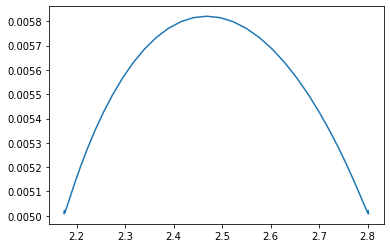

In [30]:
import matplotlib.pyplot as plt
plt.plot(fit_result, approximated_final)

## Correct version (in lab frame)

In [31]:
new_cross = np.array(
[1.52, 1.52, 1.49, 1.46, 1.42, 1.36, 1.3, 1.23, 1.16, 1.09, 1.03,
 0.965, 0.907, 0.855, 0.812, 0.778, 0.753, 0.738, 0.731, 0.734, 
 0.745, 0.763, 0.788, 0.818, 0.852, 0.889, 0.928, 0.967, 1, 1.04, 
 1.07, 1.1, 1.13, 1.15, 1.17, 1.18, 1.18]
)

Text(0.5, 1.0, 'Cross section VS Angles')

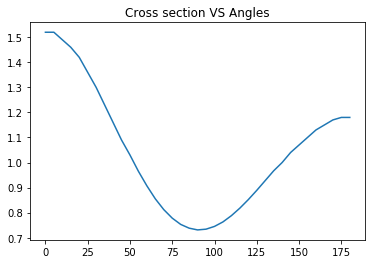

In [32]:
plt.plot(angle, new_cross)
plt.title('Cross section VS Angles')

Text(0.5, 1.0, 'Cross section VS Energy')

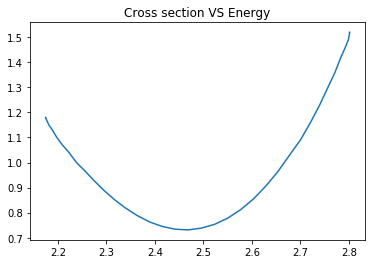

In [33]:
plt.plot(fit_result, new_cross)
plt.title('Cross section VS Energy')

### Normalization and fitting

In [34]:
coeff_new = np.polyfit(angle, new_cross/np.sum(new_cross), 4)

In [35]:
cross_fitted = coeff_new[0] * angle**4 + coeff_new[1] * angle**3 + coeff_new[2] * angle**2 + coeff_new[3] * angle + coeff_new[4]

In [36]:
coeff_new

array([-2.85692044e-10,  1.00118550e-07, -8.89313307e-06, -3.25438874e-05,
        3.97964858e-02])

Text(0.5, 1.0, 'Cross section VS Angles')

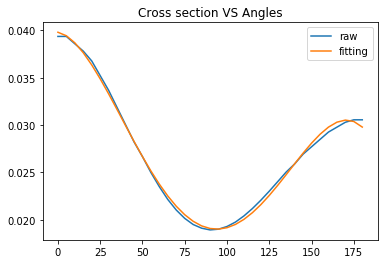

In [37]:
plt.plot(angle, new_cross/np.sum(new_cross), label = 'raw')
plt.plot(angle, cross_fitted, label = 'fitting')
plt.legend()
plt.title('Cross section VS Angles')

### To get the CDF

In [38]:
cross_normalized = new_cross/np.sum(new_cross)

In [39]:
cummulative_new = np.array([cross_normalized[:i].sum() for i in range(37)])

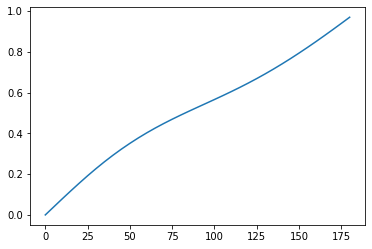

In [40]:
plt.plot(angle, cummulative_new)

In [41]:
coeff_new_cdf = np.polyfit(angle, cummulative_new, 4)

In [42]:
coeff_new_cdf

array([-9.78454219e-11,  2.11642813e-07, -5.71078133e-05,  9.45413306e-03,
       -7.72571642e-03])

In [43]:
new_cdf_fit = angle**4 * coeff_new_cdf[0] + angle**3 * coeff_new_cdf[1] + angle**2 * coeff_new_cdf[2] + angle * coeff_new_cdf[3] + coeff_new_cdf[4]

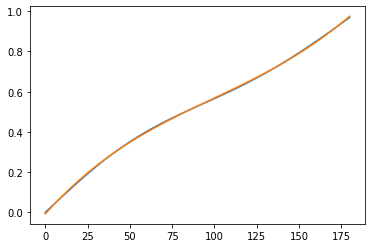

In [44]:
plt.plot(angle, cummulative_new)
plt.plot(angle, new_cdf_fit)